In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
data1 = pd.read_csv('fraudTest.csv')

data2 = pd.read_csv('fraudTrain.csv')

In [7]:
data = pd.concat([data1, data2], ignore_index=True)

In [8]:
print("Dataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422975 entries, 0 to 422974
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             422975 non-null  int64  
 1   trans_date_trans_time  422975 non-null  object 
 2   cc_num                 422975 non-null  int64  
 3   merchant               422974 non-null  object 
 4   category               422974 non-null  object 
 5   amt                    422974 non-null  float64
 6   first                  422974 non-null  object 
 7   last                   422974 non-null  object 
 8   gender                 422974 non-null  object 
 9   street                 422974 non-null  object 
 10  city                   422974 non-null  object 
 11  state                  422974 non-null  object 
 12  zip                    422974 non-null  float64
 13  lat                    422974 non-null  float64
 14  long           

In [9]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          Unnamed: 0        cc_num            amt            zip  \
count  422975.000000  4.229750e+05  422974.000000  422974.000000   
mean   109647.706959  4.187049e+17      70.300024   48797.420972   
std     67362.873106  1.310938e+18     154.653778   26872.824706   
min         0.000000  3.040768e+09       1.000000    1257.000000   
25%     52871.500000  1.800400e+14       9.640000   26237.000000   
50%    105743.000000  3.520550e+15      47.500000   48174.000000   
75%    158615.000000  4.635331e+15      83.320000   72011.000000   
max    252125.000000  4.992346e+18   16837.080000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  422974.000000  422974.000000  4.229740e+05  4.229730e+05   
mean       38.542015     -90.211471  8.917237e+04  1.357015e+09   
std         5.071107      13.739715  3.017664e+05  2.273741e+07   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.79

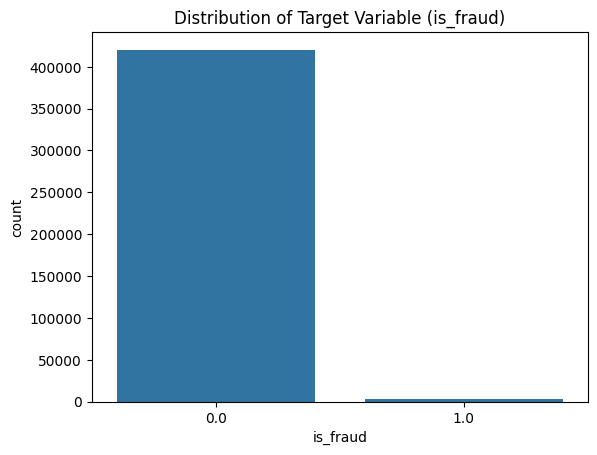

In [10]:
sns.countplot(x='is_fraud', data=data)
plt.title('Distribution of Target Variable (is_fraud)')
plt.show()

<ipython-input-11-f0c3e6e1f60f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


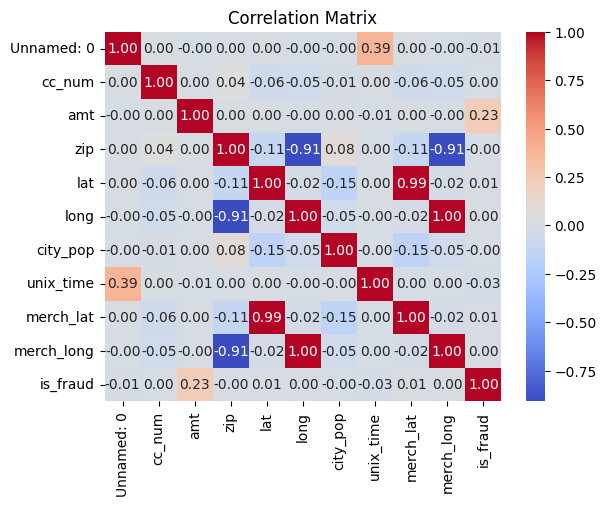

In [11]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']


In [13]:
if y.isnull().any():
    print("Warning: Missing values in the target variable. Handling missing values.")

    # Drop rows with missing target values
    X = X[~y.isnull()]
    y = y.dropna()

In [14]:
X_numeric = X.select_dtypes(include=['number'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

In [15]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [17]:
scaler = StandardScaler()
X_train_imputed_scaled = scaler.fit_transform(X_train_imputed)
X_test_imputed_scaled = scaler.transform(X_test_imputed)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_imputed_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_imputed_scaled)



# Evaluate Logistic Regression
accuracy = accuracy_score(y_test, y_pred_logreg)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
classification_rep = classification_report(y_test, y_pred_logreg)

# Display Results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}\n")

Accuracy: 0.9931438028252261
Confusion Matrix:
[[84015    56]
 [  524     0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     84071
         1.0       0.00      0.00      0.00       524

    accuracy                           0.99     84595
   macro avg       0.50      0.50      0.50     84595
weighted avg       0.99      0.99      0.99     84595


